In [ ]:
!pip install comet_ml

In [1]:
from comet_ml import Experiment

In [ ]:
experiment = Experiment(#api_key=YOUR API KEY HERE, project_name='', workspace='')

In [ ]:
#MOVE THIS CELL WHERE APPROPRIATE
#Check "Comet starter notebook" preprocessing for more info
#Remember to save new parameters and metrics in a dictionary for logging
#params = {}
#metrics = {}

#Log parameters and results
#experiment.log_parameters(params)
#experiment.log_metrics(metrics)

In [ ]:
#MOVE THIS CELL WHERE APPROPRIATE
#Check "Comet starter notebook" preprocessing for more info
#experiment.end()

In [1]:
import numpy as np
import pandas as pd
import spacy

In [2]:
nlp = spacy.load('en_core_web_lg')

In [179]:
df = pd.read_csv('data/train.csv')
df.head()

sentiment                                            message  tweetid
0          1  PolySciMajor EPA chief doesn't think carbon di...   625221
1          1  It's not like we lack evidence of anthropogeni...   126103
2          2  RT @RawStory: Researchers say we have three ye...   698562
3          1  #TodayinMaker# WIRED : 2016 was a pivotal year...   573736
4          1  RT @SoyNovioDeTodas: It's 2016, and a racist, ...   466954

In [170]:
print(len(df))
print(len(set(df['message'])))
print(df.isna().sum())

15819
14229
sentiment    0
message      0
tweetid      0
dtype: int64


In [171]:
#Drop duplicate tweets
df = df.drop_duplicates(['message'])
print(df.head())
print(len(df))
print(len(set(df['message'])))

   sentiment                                            message  tweetid
0          1  PolySciMajor EPA chief doesn't think carbon di...   625221
1          1  It's not like we lack evidence of anthropogeni...   126103
2          2  RT @RawStory: Researchers say we have three ye...   698562
3          1  #TodayinMaker# WIRED : 2016 was a pivotal year...   573736
4          1  RT @SoyNovioDeTodas: It's 2016, and a racist, ...   466954
14229
14229


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\piala\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


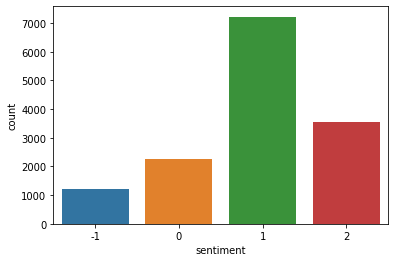

In [160]:
sns.countplot(df['sentiment'])
plt.show()

In [ ]:
#Things to consider:
#Remove 'RT ', '@___:', '#', 'urls'
#How does spelling affect the analysis?

In [8]:
import re

In [180]:
df = df.iloc[0:100, :]

In [181]:
#Remove spaces after hashtags
for i in range(len(df)):
    for j in re.finditer('# ', df.iloc[i, 1]):
        if j.span() is not None:
            df.iloc[i, 1] = re.sub(df.iloc[i, 1][j.span()[0]:j.span()[1]], r'#', df.iloc[i, 1])
df.head()

sentiment                                            message  tweetid
0          1  PolySciMajor EPA chief doesn't think carbon di...   625221
1          1  It's not like we lack evidence of anthropogeni...   126103
2          2  RT @RawStory: Researchers say we have three ye...   698562
3          1  #TodayinMaker#WIRED : 2016 was a pivotal year ...   573736
4          1  RT @SoyNovioDeTodas: It's 2016, and a racist, ...   466954

In [182]:
#Remove hashtags, mentions and urls
regex_pattern = ['#[\w]*', '@[\w]*:', '@[\w]*', '((http|https)\:\/\/)?[a-zA-Z0-9\.\/\?\:@\-_=#]+\.([a-zA-Z]){2,6}([a-zA-Z0-9\.\&\/\?\:@\-_=#])*']
for i in range(len(df)):
    for j in range(len(regex_pattern)):
        for k in re.finditer(regex_pattern[j], df.iloc[i, 1]):
            if k.span() is not None:
                df.iloc[i, 1] = re.sub(k.group().strip(), '', df.iloc[i, 1])
df.head()

sentiment                                            message  tweetid
0          1  PolySciMajor EPA chief doesn't think carbon di...   625221
1          1  It's not like we lack evidence of anthropogeni...   126103
2          2  RT  Researchers say we have three years to act...   698562
3          1   : 2016 was a pivotal year in the war on clima...   573736
4          1  RT  It's 2016, and a racist, sexist, climate c...   466954

In [183]:
#Reduce strings of repeated letters down to 2 eg looooooooove becomes loove (easier to correct later)
for i in range(len(df)):
    df.iloc[i, 1] = re.sub(r'([a-z])\1+', r'\1\1', df.iloc[i, 1])
    df.iloc[i, 1] = re.sub(r':', r'', df.iloc[i, 1])
df.head()

sentiment                                            message  tweetid
0          1  PolySciMajor EPA chief doesn't think carbon di...   625221
1          1  It's not like we lack evidence of anthropogeni...   126103
2          2  RT  Researchers say we have three years to act...   698562
3          1    2016 was a pivotal year in the war on climat...   573736
4          1  RT  It's 2016, and a racist, sexist, climate c...   466954

In [184]:
df['length'] = df['message'].apply(lambda i: len(i))
df.head()

sentiment                                            message  tweetid  \
0          1  PolySciMajor EPA chief doesn't think carbon di...   625221   
1          1  It's not like we lack evidence of anthropogeni...   126103   
2          2  RT  Researchers say we have three years to act...   698562   
3          1    2016 was a pivotal year in the war on climat...   573736   
4          1  RT  It's 2016, and a racist, sexist, climate c...   466954   

   length  
0     108  
1      62  
2      88  
3      55  
4      91

In [152]:
import nltk

In [154]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\piala\AppData\Roaming\nltk_data...


True

In [155]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

In [185]:
#df['scores'] = df['message'].apply(lambda review: sid.polarity_scores(review))

df['compound']  = df['message'].apply(lambda review: sid.polarity_scores(review)).apply(lambda score_dict: score_dict['compound'])

df.head()

sentiment                                            message  tweetid  \
0          1  PolySciMajor EPA chief doesn't think carbon di...   625221   
1          1  It's not like we lack evidence of anthropogeni...   126103   
2          2  RT  Researchers say we have three years to act...   698562   
3          1    2016 was a pivotal year in the war on climat...   573736   
4          1  RT  It's 2016, and a racist, sexist, climate c...   466954   

   length  compound  
0     108    0.2244  
1      62    0.1159  
2      88    0.0000  
3      55   -0.5994  
4      91   -0.7506

In [167]:
from sklearn.feature_extraction.text import CountVectorizer

In [168]:
CV = CountVectorizer()

In [186]:
CV.fit_transform(df.iloc[:, 1])

<100x654 sparse matrix of type '<class 'numpy.int64'>'
	with 1489 stored elements in Compressed Sparse Row format>

In [188]:
df.shape

(100, 5)

In [147]:
#print(nlp.Defaults.stop_words)

In [189]:
from sklearn.model_selection import train_test_split
X = df[['length', 'compound']]
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [191]:
from sklearn.linear_model import LogisticRegression

In [192]:
regressor = LogisticRegression()

In [193]:
regressor.fit(X_train, y_train)

C:\Users\piala\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [194]:
y_pred = regressor.predict(X_test)

In [195]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [196]:
accuracy_score(y_pred,y_test)

0.6666666666666666

In [198]:
print(classification_report(y_pred,y_test))

C:\Users\piala\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.14      0.50      0.22         2
           1       0.95      0.68      0.79        31
           2       0.00      0.00      0.00         0

    accuracy                           0.67        33
   macro avg       0.37      0.39      0.34        33
weighted avg       0.91      0.67      0.76        33



In [199]:
print(confusion_matrix(y_pred,y_test))

[[ 1  1  0]
 [ 6 21  4]
 [ 0  0  0]]


In [200]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1], dtype=int64)

In [201]:
y_test

83    0
53    0
70    1
45    2
44    2
39    0
22    0
80    1
10    1
0     1
18    1
30    0
73    1
33    1
90    1
4     1
76    1
77    1
12    2
31    1
55    1
88    0
26    2
42    1
69    0
15    1
40    1
96    1
9     1
72    1
11    1
47    1
85    1
Name: sentiment, dtype: int64